# Final Project Submission

* Student name: Mwenda Mugambi
* Student pace: Part Time

# Project Overview
For this project, I will use exploratory data analysis on datasets from the below websites to generate insights for Microsoft 
* https://www.boxofficemojo.com/
* https://www.imdb.com/
* https://www.rottentomatoes.com/
* https://www.themoviedb.org/
* https://www.the-numbers.com/

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Exploratory Data Analysis
In this section, I'll be going through the data sets I have to understand the structure and determine the ones I'll be using for my project.
* I start by importing the libraries and the datasets that will be necessary for the process.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the data sets I'll be using into Dataframes
bom_movies = pd.read_csv("Datasets/bom.movie_gross.csv")
title_basics = pd.read_csv("Datasets/title.basics.csv")
title_akas = pd.read_csv("Datasets/title.akas.csv")
name_basics = pd.read_csv("Datasets/name.basics.csv")
movie_budgets = pd.read_csv("Datasets/tn.movie_budgets.csv")
title_crew = pd.read_csv("Datasets/title.crew.csv")

# Data Cleaning and Analysis
In this section I do a deep dive into the datasets to understand the structure and state of the data.

After understanding the data we have and the state it's in, we'll get our hands dirty and start to clean it up.
Cleaning it is essential for us so that we can have accurate data to work with when we do a deeper analysis and get to answer some questions at the end of our analysis 

Let's get started.

# 1. Analyzing movie_budgets DataFrame

In [3]:
# Getting a summary of the DataFrame's structure and content
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Checking the first 5 entries in the data
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Summary findings
From the summary we see that 
* The dataset contains 6 columns and 5782 rows.
* The datasets contains no missing values.
* The production_budget, domestic_gross and worldwide_gross contains financial values which should be in integer type but seem to be object type because of the dollar sign and commas. To turn it to integers, we'll need to drop the dollar sign and comma.

In [5]:
# Checking for duplicates
movie_budgets.duplicated().sum()

0

In [6]:
# Cleaning up the financial entries and Removing the dollar sign and comma
for column in ["production_budget", "domestic_gross", "worldwide_gross"]:
    if movie_budgets[column].dtype == "object":
        movie_budgets[column] = movie_budgets[column].str.replace("$", "").str.replace(",", "").astype("int64")

In [7]:
# Confirming that the type casting has worked
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [8]:
# Dropping the "id" column because we don't need it.
movie_budgets = movie_budgets.drop("id", axis= 1)

In [9]:
# Reviewing the state
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


* In this state we can now do some statistics analysis for the production budget, domestic and worldwide gross to get a quick overview of the distribution and get insights into the central tendencies and distribution of the data.

In [10]:
# Calculating descriptive statistics.
movie_budgets.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [11]:
print(f"Max: {movie_budgets['production_budget'].max()}")
print(f"Min: {movie_budgets['production_budget'].min()}")
print(f"Mean: {movie_budgets['production_budget'].mean()}")
print(f"STD: {movie_budgets['production_budget'].std()}")

Max: 425000000
Min: 1100
Mean: 31587757.0965064
STD: 41812076.82694309


In [12]:
print(f"Max: {movie_budgets['domestic_gross'].max()}")
print(f"Min: {movie_budgets['domestic_gross'].min()}")
print(f"Mean: {movie_budgets['domestic_gross'].mean()}")
print(f"STD: {movie_budgets['domestic_gross'].std()}")

Max: 936662225
Min: 0
Mean: 41873326.867001034
STD: 68240597.35690415


In [13]:
print(f"Max: {movie_budgets['worldwide_gross'].max()}")
print(f"Min: {movie_budgets['worldwide_gross'].min()}")
print(f"Mean: {movie_budgets['worldwide_gross'].mean()}")
print(f"STD: {movie_budgets['worldwide_gross'].std()}")

Max: 2776345279
Min: 0
Mean: 91487460.90643376
STD: 174719968.77890477


### Calculating ROI
Having turned our financial data to integers , We can now calculate the ROI of each movie using the "worldwide_gross" and "production_budget" columns to get more insights into the data.

In [14]:
# Calculating ROI and making a new column to have it asigned to the specific movies
movie_budgets["ROI"] = ((movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]) 
                        / (movie_budgets["production_budget"]) * 100)

In [15]:
# Confirming the column has been added
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636


In [16]:
# Calculating descriptive statistics of the "ROI" column
movie_budgets["ROI"].describe()

count      5782.000000
mean        380.016137
std        2953.028231
min        -100.000000
25%         -50.770440
50%          70.830983
75%         275.834608
max      179900.000000
Name: ROI, dtype: float64

In [17]:
# Identifying the movie with the 179900 ROI which is way of from the mean. This is an outlier that could skew our data
# Finding the row with the maximum ROI
max_roi_movie = movie_budgets[movie_budgets["ROI"] == 179900]

# Printing the movie with the maximum ROI
max_roi_movie["movie"]

5745    Deep Throat
Name: movie, dtype: object

Dropping the outlier and visualizing the data to identify the movies with the positive ROIs

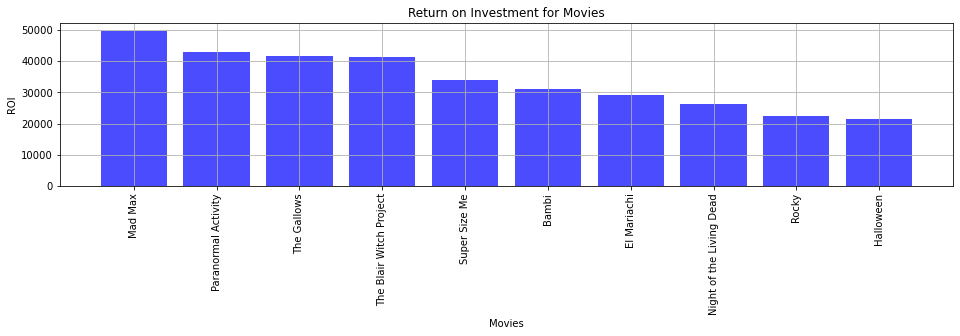

In [18]:
# Dropping the outlier
movie_budgets = movie_budgets[movie_budgets["movie"] != "Deep Throat"]

# Filtering the DataFrame to positive ROIs only because those are relevant for business decisions.
positive_roi = movie_budgets[movie_budgets["ROI"] > 0]

# Sorting the data by ROI in descending order
sorted_roi = positive_roi.sort_values(by= "ROI", ascending= False)

# Getting the movies and corresponding ROI values for the first 10 entries
movie_names = sorted_roi[:10]["movie"]
roi = sorted_roi[:10]["ROI"]

# Creating a bar plot
plt.figure(figsize= (16, 3))
plt.bar(movie_names, roi, color = "blue", alpha= 0.7)
plt.xlabel("Movies")
plt.xticks(rotation= 90)
plt.ylabel("ROI")
plt.title("Return on Investment for Movies")
plt.grid();

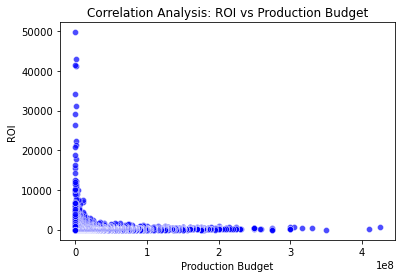

In [19]:
# Creating a scatter plot
sns.scatterplot(x= "production_budget", y= "ROI", data = movie_budgets, color= "blue", alpha=0.7 )
plt.xlabel("Production Budget")
plt.ylabel("ROI")
plt.title("Correlation Analysis: ROI vs Production Budget");


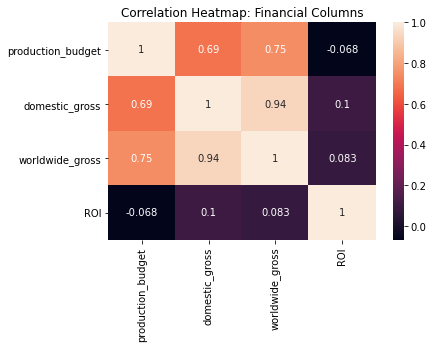

In [20]:
# Creating the heatmap
sns.heatmap(movie_budgets.corr(), annot= True)
plt.title("Correlation Heatmap: Financial Columns");

#### Key Findings
In this section, we see that 
* There seems to be a a strong positive correlation between the "production_budget" and "worldwide_gross" This however does not necessarily indicate cause-and-effect. We will do further analysis to understand it better.
* The correlation between "ROI" and "production_budget" is close to zero, indicating a weak negative correlation relationship between the two. Implying that when production budget increases, the ROI tends to decrease slightly.
* From the sample data of the positive ROIs, Mad Max, Paranormal Activity, The Gallows, The Blair Witch Project and Super Size Me have the highest ROIs.

# 2. Analyzing bom_movies DataFrame


In [21]:
# Getting a summary of the DataFrame's structure and content.
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
# Checking the first 5 entries in the data
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Summary findings
From the summary we see that 
* The dataset contains 5 columns (Title, Studio, domestic_gross, foreign_gross, Year ) and 3387 rows.
* We see that we have some missing values in some of the columns.
* The foreign_gross column should be integers but is in object type instead which implies it's a string.
* With this data, we should be able to check the movie performance of the different studios domestically and foreign.

In [23]:
# Checking for duplicates
bom_movies.duplicated().sum()

0

* We start by dropping the missing values in "studio" and "domestic_gross" since they are not that many and won't affect our analysis.
* For the foreign_gross data, we fill the missing values with 0 intead of dropping because dropping the 1349 missing values would affect the accuracy of our analysis between the studio and domestic_gross.

In [24]:
# Dropping the rows with null values on the studio and domestic_gross column
bom_movies.dropna(subset=["studio"], inplace=True)
bom_movies.dropna(subset=["domestic_gross"], inplace=True)

# Filling the missing values in foreign_gross with 0
bom_movies.fillna(0, inplace=True)

We then confirm if our strategy to deal with the missing values worked.

In [25]:
# Cheking if our cleaning worked
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Now we convert them to the correct datatypes

In [26]:
# Converting data in "foreign_gross" column to integers
bom_movies["foreign_gross"] = pd.to_numeric(bom_movies["foreign_gross"], errors= "coerce")

# Confirming the changes
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [27]:
bom_movies.fillna(0, inplace= True)
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [28]:
# Confirming if our strategy to clean the data worked. 
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Bar graph to look at the relationship between studios and Domestic gross

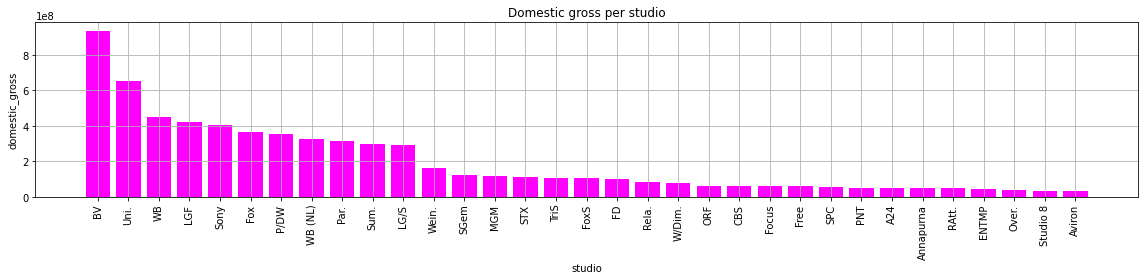

In [29]:
# Getting the studio names and domestic_gross for the first 800 entries
# Sorting the values by domestic_gross 
sorted_data = bom_movies.sort_values("domestic_gross", ascending=False)


studio = sorted_data["studio"][:800]
domestic_gross = sorted_data["domestic_gross"][:800]

# Creating a  bar plot
plt.figure(figsize= (16, 4))
plt.bar(studio, domestic_gross, color = "magenta")
plt.xlabel("studio")
plt.xticks(rotation= 90)
plt.ylabel("domestic_gross")
plt.title("Domestic gross per studio")
plt.grid()
plt.tight_layout();

### Bar graph to look at the relationship between studios and Foreign gross

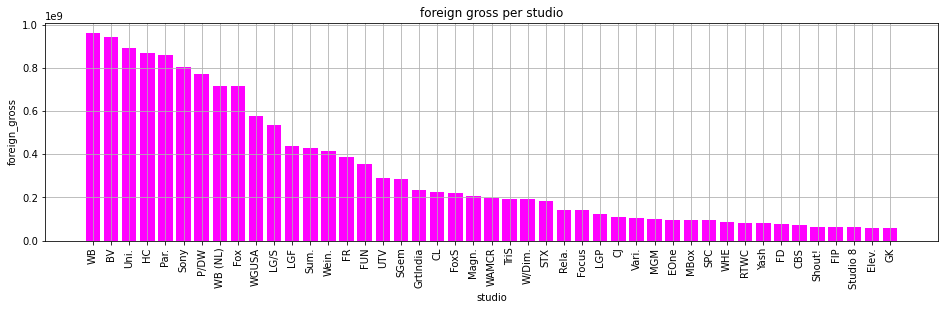

In [30]:
# Getting the studio names and foreign_gross for the first 600 entries
# Sorting the values by foreign_gross 
sorted_data = bom_movies.sort_values("foreign_gross", ascending=False)

studio = sorted_data["studio"][:600]
domestic_gross = sorted_data["foreign_gross"][:600]

# Creating a bar plot
plt.figure(figsize= (16, 4))
plt.bar(studio, domestic_gross, color = "magenta")
plt.xlabel("studio")
plt.xticks(rotation= 90)
plt.ylabel("foreign_gross")
plt.title("foreign gross per studio")
plt.grid();

### Heatmap to look at the correlation between domestic gross and Foreign gross

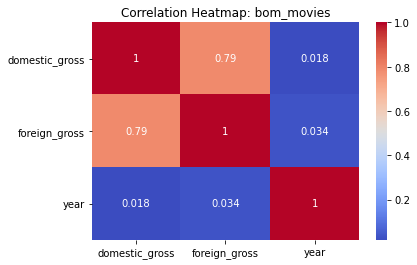

In [31]:
# Creating a heatmap
sns.heatmap(bom_movies.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: bom_movies");

### Scatterplot to confirm at the correlation between domestic gross and Foreign gross

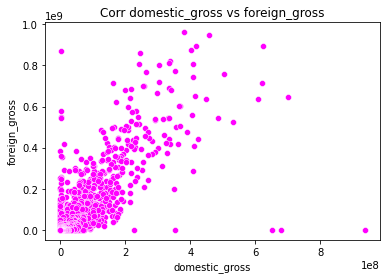

In [32]:
# Creating a scatter plot
sns.scatterplot(x= "domestic_gross", y= "foreign_gross", data = bom_movies, color= "magenta" )
plt.xlabel("domestic_gross")
plt.ylabel("foreign_gross")
plt.title("Corr domestic_gross vs foreign_gross");

#### Findings
From the summary we see that 
* Studios with the highest domestic gross are "BV" , "Uni", "WB", "LGF" and "Sony"
* Studios with the highest foreign gross are "WB", "BV", "Uni", "HC" and "Par"
* There seems to be a a strong positive correlation between the "domestic_gross" and "foreign_gross".
* Studios seem to have better "foreign_gross" than "domestic gross" - This is expected as domestic refers to sales in one country while foreign is sales from multiple countries outside where the studios are based.

# 3.  Analyzing title_akas DataFrame


In [33]:
#Getting a summary of the DataFrame's structure and content
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [34]:
#Getting a sample of the data 
title_akas.sample(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
246598,tt5305230,1,CzechMate: In Search of Jirí Menzel,IN,NaN,NaN,NaN,0.0
27332,tt1336608,1,La era del rock,CO,NaN,imdbDisplay,NaN,0.0
256190,tt6343744,1,Death of the Sheik,US,NaN,NaN,NaN,0.0
2841,tt10330046,2,Stus,UA,NaN,working,NaN,0.0
316774,tt4693606,1,Tskhra mtas iqit,NaN,NaN,original,NaN,1.0


#### Summary findings
From the summary we see that 
* The "title_akas" dataset contains "ordering", "title", "region", "language", "types", "attributes"  and "is_original_title" columns. 
* The dataset contains 8 columns and 331703 rows.
* The "title_id",  "ordering" and "title" columns don't have any missing values, but the rest do.
* With this data, we should be able to confirm if the "title_id" identifies Movie names in the "title" column.

Since we want to work with "title_id" and "title" we can go on and clean the others.

In [35]:
#Checking the number of missing values in the columns.
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

From this analysis, we can drop the language types and attributes columns which have too many missing values. Without context we can't go on to filling the missing values.

In [36]:
# Dropping the columns
columns = ["language", "attributes", "types"]
title_akas = title_akas.drop(columns, axis= 1)
title_akas.head()

,title_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


* Further analysis shows that the titles column contains movie names in different languages which is confirmed by the multiple duplicate entries in the "title_id" column.
* I will need to filter out the data so that I can remain with the movie namea that are in english and the corresponfing title Ids.

### Filtering the data

In [37]:
#Filtering them by region US to give us English titles.
filtered_titles = title_akas[title_akas["region"] == "US"]

# Select only the relevant columns
filtered_titles = filtered_titles[["title_id", "title", "region"]]
filtered_titles.head(10)

,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US
50,tt0401729,John Carter of Mars,US
51,tt0401729,A Princess of Mars,US
70,tt0401729,John Carter,US
78,tt0401729,Barsoom,US
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,US


### Findings
* It appears that the title_id "tt0369610" is associated with multiple movie titles, ie:  "Jurassic World 3D", "Jurassic World", "Ebb Tide", "Jurassic Park IV", and "Jurassic Park 4". 
* The same behavior seems to be evident across multiple titles. This could mean that ids represent movie franchises.

In [38]:
# Checking a summary of the data we have remaining. 
filtered_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51490 entries, 12 to 331694
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_id  51490 non-null  object
 1   title     51490 non-null  object
 2   region    51490 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


Now that we understand the data and the relationship between the title_id and the titles, We can use that to merge it with another DataFrame later to do a deeper analysis.

# 4.  Analyzing title_basics


In [39]:
# Getting a summary of the DataFrame's structure and content.
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [40]:
# Checking the first 5 entries in the dataframe.
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Summary findings
From the summary we see that 
* The dataset contains 6 columns and 146144 rows.
* The "title_basics" dataset conatains "tconst", "primary_title", "original_title", "start_year", "runtime_minutes" and "genres" columns. 

* The original_title, runtime_minutes and genres columns have missing values.
* Now that we have the genres and titles, we can merge it with another DataFrame later on and analyse the movie performances by genres.

From the summary, We now drop the "original_title" and "runtime_minutes" columns since we will not be using them in this analysis.

In [41]:
# Dropping the columns we don't need and confirming the change.
columns = ["original_title", "runtime_minutes"]
title_basics = title_basics.drop(columns, axis= 1)
title_basics.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [42]:
# Checking the percentage of the missing data in genres column
title_basics["genres"].isna().mean() * 100

3.7004598204510617

The missing values in the "genres" column are only 3% so dropping them will not affect the data.


In [43]:
# Dropping the missing values in the genres column.
title_basics.dropna(subset= ["genres"], inplace= True)

# Confirming the change.
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         140736 non-null  object
 1   primary_title  140736 non-null  object
 2   start_year     140736 non-null  int64 
 3   genres         140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB


Now we can do an analysis to see which genres have the highest number of movies.

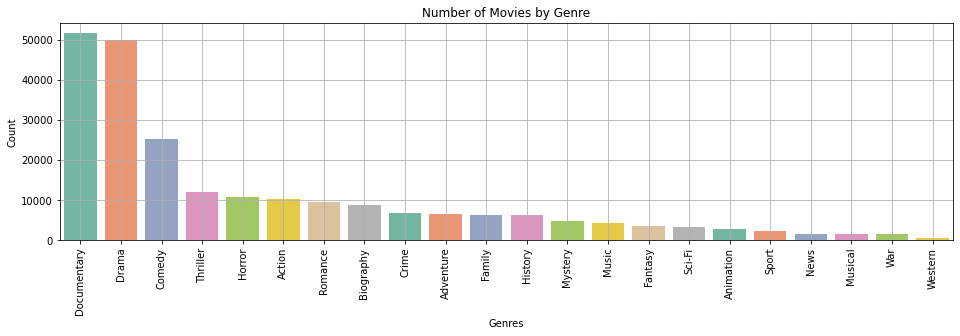

In [44]:
# Splitting the genres column by commas, stacking and calculating the value counts of the genres.
genre_counts = title_basics["genres"].str.split(",", expand= True).stack().value_counts()

# Plotting a bar graph.
plt.figure(figsize=(16, 4))
sns.barplot(x= genre_counts[:22].index, y= genre_counts[:22].values, palette= "Set2")
plt.xlabel("Genres")
plt.xticks(rotation= 90)
plt.ylabel("Count")
plt.title("Number of Movies by Genre")
plt.grid();

After doing more research on the movies, I discovered that the entries in the "start_year" column actually represent the movie release dates.

* From this discovery, we can now do an anlysis of the number of movies by release years.

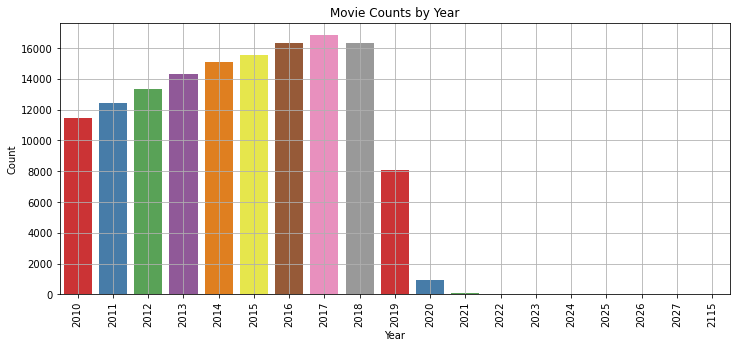

In [45]:
# Plotting a bargraph to see the number of movies by the years.
plt.figure(figsize= (12, 5))
sns.countplot(data= title_basics, x= "start_year", palette= "Set1")
plt.xlabel("Year")
plt.xticks(rotation= 90)
plt.ylabel("Count")
plt.title("Movie Counts by Year")
plt.grid();

### Findings
* We see that the "Documentary", "Drama", "Comedy", "Thriller" and "Horror" genres have the most movies.
In this data however, we do not have evidence that they perform the best.
* We also see that the number of movies released kept rising over the years peaking in 2017.
* There was a drastic drop on movie releases from 2018 to 2020. 
* In 2020, the number of movie releases decreased significantly probably as a result of the global Covid 19 pandemic where people were in lockdown and promoted popularity of streaming services. This suggest a change in consumer behavior.

# 5.  Analyzing name_basics


In [46]:
# Checking the first 5 entries in the dataset
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [47]:
# Getting a summary of the DataFrame's structure and content
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### Summary findings
From the summary we see that 
* The dataset contains 6 columns and 606648 rows.
* The "birth_year", "death_year", "primary_profession", and "known_for_titles" have missing values.
* The "known_for_titles" column contains multiple entries similar to the ones in the "title_id" column in the "title_akas" dataframe.
* The "nconst" column contains codes that seem to be unique identifiers for the individuals listed in the "primary_name" column.
* The "known_for_titles" column contains entries that are codes to the different movie franchises observed in the "title_akas" DataFrame.
* The "birth_year" and "death_year" columns have the highest number of missing values.
It would be better to drop the columns fully.

In [48]:
# Dropping the birth_year and death_year columns
columns = ["birth_year", "death_year"]
name_basics = name_basics.drop(columns, axis= 1)

# Previewing to confirm the changes.
name_basics.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [49]:
#Checking the percentage of missing values in the Data Frame.
name_basics.isna().mean() * 100

nconst                0.000000
primary_name          0.000000
primary_profession    8.462898
known_for_titles      4.978835
dtype: float64

* Now from the percentage analysis, we can also see that the percentage of missing values in "primary_profession" and "known_for_titles" columns is less than 10%. I will drop those missing entries so as to work with cleaner data. 

In [50]:
# Droping the rows with missing values in "primary_profession" and "known_for_titles" columns
name_basics.dropna(subset= ["primary_profession"], inplace=True)
name_basics.dropna(subset= ["known_for_titles"], inplace=True)

# Verifying the Changes
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535137 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              535137 non-null  object
 1   primary_name        535137 non-null  object
 2   primary_profession  535137 non-null  object
 3   known_for_titles    535137 non-null  object
dtypes: object(4)
memory usage: 20.4+ MB


# 6.  Analyzing title_crew


In [51]:
# Getting a summary of the DataFrame's structure and content
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [52]:
# Checking the first 5 entries in the daataframe
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


#### Summary findings
From the summary we see that 
* The dataset contains 3 columns and 146144 rows.
* The directors and writers column contain missing values.
* The entries seem to be codes relating to movies and directors and writers names.
* The dataset seems relatable to the name_basics dataset for more analysis it would be possible to merge the two.

In [53]:
# Checking the percentage of missing values in our DataFrame.
title_crew.isna().mean() * 100

tconst        0.000000
directors     3.918738
writers      24.553180
dtype: float64

* We see that the "directors" column is missing 3% of it's data.
* We will go a head to drop those entries.

In [54]:
# Drop rows with missing values in the specified column
title_crew.dropna(subset= ["directors"], inplace= True)

# Verifying the changes.
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140417 entries, 0 to 146142
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     140417 non-null  object
 1   directors  140417 non-null  object
 2   writers    109008 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


In [55]:
# Sampling the data to look at the state of the entries.
title_crew.sample(10)

,tconst,directors,writers
89711,tt1965162,nm3099213,nm3099213
110901,tt6869936,nm6499977,"nm8980316,nm6497854,nm6499977"
134835,tt5577186,nm1825363,NaN
57182,tt10189338,nm0765621,"nm0765621,nm10165856"
127713,tt6615346,nm4959548,nm4959548
81066,tt4651170,nm1005888,"nm1693600,nm2309700"
37688,tt4004608,"nm4919215,nm4732329",nm4732329
35392,tt4444534,nm7119555,"nm7119558,nm1944300,nm7119555"
40750,tt7105010,nm9111058,nm4768685
103387,tt8655618,nm9949704,nm9949704


* We see that some of the entries in the directors column have multiple values seperated by commas. 

# Merging DataFrames to do deeper analysis

Now that we've reviewed the data, we have an idea of the questions we can answer by merging some of our data Frames.

### Questions
1. Which studios have the Highiest ROI and make the most profitable Movies?
2. Which genres are popular among the studios?
3. Which genres are profitable and have the highest ROI?
4. Which Directors have the most profitable movies?
5. What are the number of movies produced over the years?

After a deeper analysis, We see that the "bom_movies" and "title_basics" DataFrames can be merged on the "titles" and "primary_title" columns. We can rename the "primary_title" column to "title" so that we can do the join.

In [56]:
# Changing the "primary_title" column name to "title"
title_basics = title_basics.rename(columns={"primary_title": "title"})

In [57]:
# Merging the two DataFrames
new_data = bom_movies.merge(title_basics, on= "title", how= "inner")
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3301 non-null   object 
 1   studio          3301 non-null   object 
 2   domestic_gross  3301 non-null   float64
 3   foreign_gross   3301 non-null   float64
 4   year            3301 non-null   int64  
 5   tconst          3301 non-null   object 
 6   start_year      3301 non-null   int64  
 7   genres          3301 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 232.1+ KB


In [58]:
# checking the first 5 entries to confirm the changes.
new_data.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,start_year,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,2010,"Action,Adventure,Sci-Fi"


* Now that we've done the merge, we can now continue to do another merge with the "movie_budgets" on the title column so that we can do an analysis of the studio, genre and ROi.

In [59]:
# Renaming the "title" column in our new dataframe so that we can join it to the movie_budgets df
new_data = new_data.rename(columns={"title": "movie"})

In [60]:
# Joining the data frames.
merged_data = pd.merge(movie_budgets, new_data, on= "movie", how= "inner")
merged_data.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,ROI,studio,domestic_gross_y,foreign_gross,year,tconst,start_year,genres
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,BV,241100000.0,804600000.0,2011,tt1298650,2011,"Action,Adventure,Fantasy"
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,BV,459000000.0,946400000.0,2015,tt2395427,2015,"Action,Adventure,Sci-Fi"
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,582.711400,BV,678800000.0,0.0,2018,tt4154756,2018,"Action,Adventure,Sci-Fi"
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,118.648403,WB,229000000.0,428900000.0,2017,tt0974015,2017,"Action,Adventure,Fantasy"
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,193.206974,Sony,200100000.0,680600000.0,2015,tt2379713,2015,"Action,Adventure,Thriller"


In [61]:
# Getting a summary of the DataFrame's structure and content.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1574
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1575 non-null   object 
 1   movie              1575 non-null   object 
 2   production_budget  1575 non-null   int64  
 3   domestic_gross_x   1575 non-null   int64  
 4   worldwide_gross    1575 non-null   int64  
 5   ROI                1575 non-null   float64
 6   studio             1575 non-null   object 
 7   domestic_gross_y   1575 non-null   float64
 8   foreign_gross      1575 non-null   float64
 9   year               1575 non-null   int64  
 10  tconst             1575 non-null   object 
 11  start_year         1575 non-null   int64  
 12  genres             1575 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 172.3+ KB


## Cleaning the new DataFrame.
After joining the dataframes, we drop the columns that we will not be using for our analysis.
* "release_date", "start_year" are repetetive. We can just keep "year" column.  
* Since ROI was calculated using "production_budget" and "worldwide_gross", we don't need the other financial columns. 

In [62]:
# Dropping the columns we don't need.
columns = ["release_date", "start_year", "domestic_gross_x", "domestic_gross_y", "foreign_gross"]
merged_data= merged_data.drop(columns, axis=1)
merged_data.head(10)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000,1403013963,324.384139,BV,2015,tt2395427,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000,2048134200,582.711400,BV,2018,tt4154756,"Action,Adventure,Sci-Fi"
3,Justice League,300000000,655945209,118.648403,WB,2017,tt0974015,"Action,Adventure,Fantasy"
4,Spectre,300000000,879620923,193.206974,Sony,2015,tt2379713,"Action,Adventure,Thriller"
5,The Dark Knight Rises,275000000,1084439099,294.341491,WB,2012,tt1345836,"Action,Thriller"
6,Solo: A Star Wars Story,275000000,393151347,42.964126,BV,2018,tt3778644,"Action,Adventure,Fantasy"
7,The Lone Ranger,275000000,260002115,-5.453776,BV,2013,tt1210819,"Action,Adventure,Western"
8,John Carter,275000000,282778100,2.828400,BV,2012,tt0401729,"Action,Adventure,Sci-Fi"
9,Tangled,260000000,586477240,125.568169,BV,2010,tt0398286,"Adventure,Animation,Comedy"


* Now that we have the necessary data for our analysis, we can go on to analyse the Genres with the highest ROI

In [63]:
# Splitting the values in the 'genres' column using commas as the delimiter.
merged_data["genres"] = merged_data["genres"].str.split(",")

# creating multiple rows for movies that have multiple genres.
data = merged_data.explode("genres")

In [64]:
# Confirming the changes
data.head(2)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure


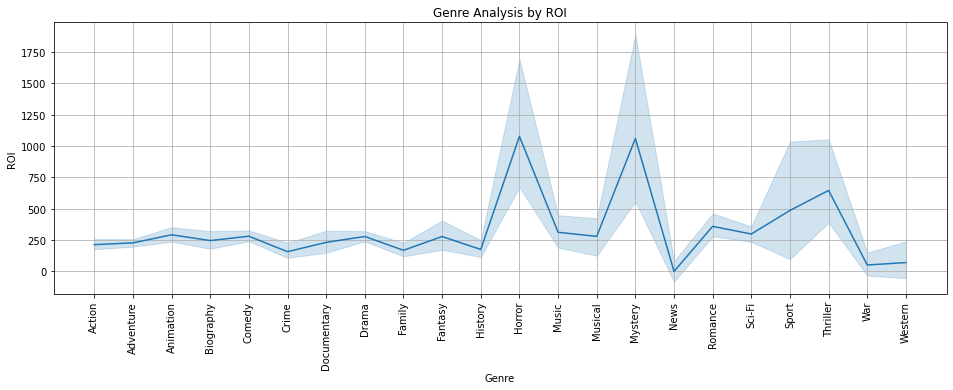

In [65]:
# Plotting the line graph.
plt.figure(figsize= (16, 5))
sns.lineplot(data= data.sort_values("genres"), x= "genres", y= "ROI")
plt.xlabel("Genre")
plt.xticks(rotation= 90)
plt.ylabel("ROI")
plt.title("Genre Analysis by ROI")
plt.grid();

* We can also do an analysis of the studios with the highest ROI, highest profit, and the genres produced by most of the studios.

In [66]:
# Filtering to have positive ROIs only.
positive_roi_df = merged_data[merged_data["ROI"] > 0]

# Grouping the dataframe by studio and calculating the average ROI.
studio_roi = positive_roi_df.groupby("studio")["ROI"].mean().reset_index()
studio_roi.head()

,studio,ROI
0,3D,230.304060
1,A24,546.731047
2,Affirm,303.844830
3,Annapurna,33.923432
4,BG,187.222304


In [67]:
#Calculating Profit and adding a new column
data["profit"] = data["worldwide_gross"] - data["production_budget"]
sorted_profit = data.sort_values("profit", ascending= False)

# Filtering to have profits only.
profit_df = data[data["profit"] > 0]

# Grouping the dataframe by studio and calculating the average profit.
studio_profit = profit_df.groupby("studio")["profit"].mean().reset_index()
profit_df.head()

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres,profit
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action,635063875
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure,635063875
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Fantasy,635063875
1,Avengers: Age of Ultron,330600000,1403013963,324.384139,BV,2015,tt2395427,Action,1072413963
1,Avengers: Age of Ultron,330600000,1403013963,324.384139,BV,2015,tt2395427,Adventure,1072413963


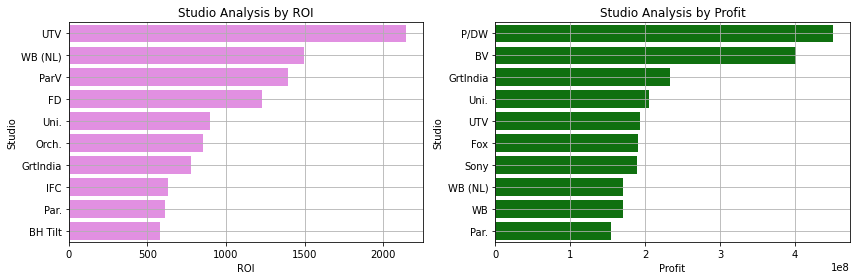

In [68]:
# Sorting the data frame by ROI in descending order
studio_roi = studio_roi.sort_values("ROI", ascending=False)

# Counting the most popular genre for each studio
studio_genre_count = data.groupby("studio")["genres"].apply(lambda x: x.value_counts().idxmax()).reset_index()
studio_genre_count.rename(columns= {"genres": "most_popular_genre"}, inplace= True)

# Creating subplots 
fig, axes = plt.subplots(1, 2, figsize= (12, 4))

# Studio Analysis by Positive ROI
sns.barplot(data=studio_roi[:10], x= "ROI", y= "studio", order=studio_roi[:10]["studio"], ax=axes[0], color= "violet")
axes[0].set_xlabel("ROI")
axes[0].set_ylabel("Studio")
axes[0].set_title("Studio Analysis by ROI")
axes[0].grid()

# Sorting the data by profit in descending order
studio_profit = studio_profit.sort_values("profit", ascending= False)

# Studio Analysis by Profit
sns.barplot(data= studio_profit[:10], x= "profit", y= "studio", order=studio_profit[:10]["studio"], color= "green")
axes[1].set_xlabel("Profit")
axes[1].set_ylabel("Studio")
axes[1].set_title("Studio Analysis by Profit")
axes[1].grid()

plt.tight_layout()

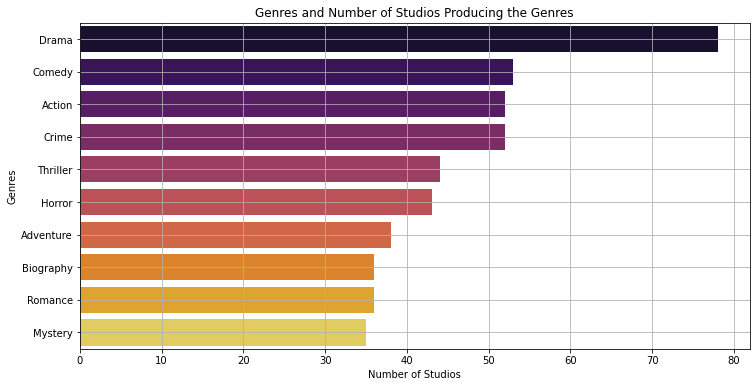

In [69]:
# Counting the number of studios producing each genre
genre_studio_count = data.groupby("genres")["studio"].nunique().reset_index()
genre_studio_count.rename(columns= {"studio": "num_studios"}, inplace= True)

# Sorting the genres by the number of studios in descending order
genre_studio_count = genre_studio_count.sort_values("num_studios", ascending= False)

# plotting bar graph for Genres and Number of Studios
plt.figure(figsize=(12, 6))
sns.barplot(data= genre_studio_count[:10], x= "num_studios", y= "genres", palette= "inferno")
plt.xlabel("Number of Studios")
plt.ylabel("Genres")
plt.title("Genres and Number of Studios Producing the Genres")
plt.xticks()
plt.grid(True)

* Next we can do an analysis of the genres and their production_budget, worldwide_gross, ROI and profits. 

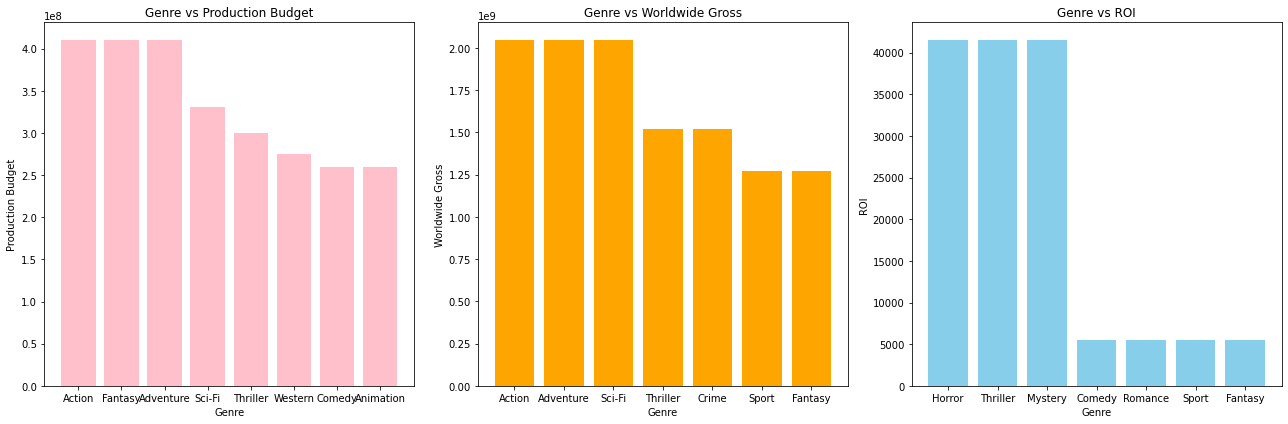

In [70]:
# Sorting the data frame by production_budget in descending order
sorted_data1 = data.sort_values("production_budget", ascending= False)

# Creating subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize= (18, 6))

# Genre and Production Budget
axes[0].bar(sorted_data1["genres"][:30], sorted_data1["production_budget"][:30], color= "pink")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Production Budget")
axes[0].set_title("Genre vs Production Budget")

# Sorting the data frame by worldwide_gross in descending order
sorted_data2 = data.sort_values("worldwide_gross", ascending= False)

# Genre and Worldwide Gross
axes[1].bar(sorted_data2["genres"][:20], sorted_data2["worldwide_gross"][:20], color= "orange")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Worldwide Gross")
axes[1].set_title("Genre vs Worldwide Gross")

# Sorting the data frame by ROI in descending order
sorted_data3 = data.sort_values("ROI", ascending= False)

# Genre and ROI
axes[2].bar(sorted_data3["genres"][:15], sorted_data3["ROI"][:15], color= "skyblue")
axes[2].set_xlabel("Genre")
axes[2].set_ylabel("ROI")
axes[2].set_title("Genre vs ROI")

plt.tight_layout();

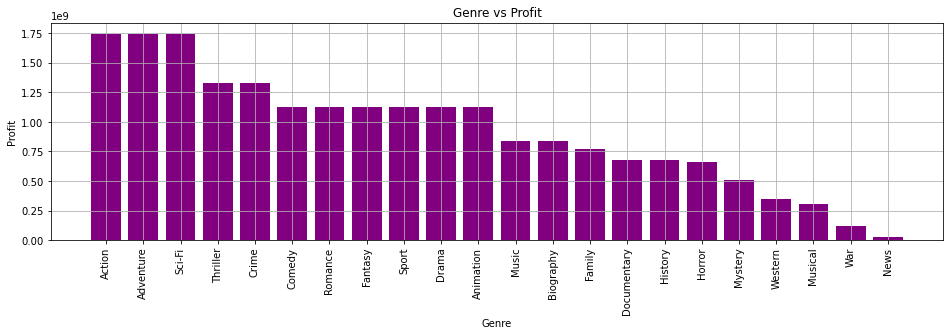

In [71]:
# Visualization- Genre vs Profit
plt.figure(figsize=(16, 4))

plt.bar(sorted_profit["genres"], sorted_profit["profit"], bottom= 0, color= "purple")
plt.xlabel("Genre")
plt.xticks(rotation= 90)
plt.ylabel("Profit")
plt.title("Genre vs Profit")
plt.ylim(bottom= 0)
plt.grid()
plt.show();

#### Merging "title_crew" and "data" data frames to Identify directors with the most successfull movies.

In [72]:
# Merging the data df and title_crew dataframes.
director_data = data.merge(title_crew, on= "tconst", how= "left")

In [73]:
# Confirming the chenges.
director_data.head(2)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres,profit,directors,writers
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action,635063875,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627"
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure,635063875,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627"


We now drop the writers column since we don't need it for our analysis. 

In [74]:
# Dropping the writers column.
director_data= director_data.drop("writers", axis= 1)

# Confirming the merge.
director_data.head(2)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres,profit,directors
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action,635063875,nm0551128
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure,635063875,nm0551128


In [75]:
# Checking for missing values.
director_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3694 non-null   object 
 1   production_budget  3694 non-null   int64  
 2   worldwide_gross    3694 non-null   int64  
 3   ROI                3694 non-null   float64
 4   studio             3694 non-null   object 
 5   year               3694 non-null   int64  
 6   tconst             3694 non-null   object 
 7   genres             3694 non-null   object 
 8   profit             3694 non-null   int64  
 9   directors          3673 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 317.5+ KB


In [76]:
# Dropping the missing values from the directors column.
director_data.dropna(subset= ["directors"], inplace= True)
director_data.isna().sum()

movie                0
production_budget    0
worldwide_gross      0
ROI                  0
studio               0
year                 0
tconst               0
genres               0
profit               0
directors            0
dtype: int64

* Now that we have the new dataframe now has the directors codes.
* We can merge it with the "name_basics" dataframe to get the directors names.

In [77]:
# Renaming the directors column to "nconst"
director_data = director_data.rename(columns= {"directors": "nconst"})
name_basics = name_basics.rename(columns= {"primary_name": "directors"})

# Joining the "director_data" to "name_basics" so that we can get the directors names
director_names = director_data.merge(name_basics, on= "nconst", how= "left")
director_names.head(2)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres,profit,nconst,directors,primary_profession,known_for_titles
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action,635063875,nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure,635063875,nm0551128,Rob Marshall,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"


In [78]:
director_names.dropna(subset= ["directors"], inplace= True)

In [79]:
colums = ["primary_profession", "known_for_titles"]
director_names= director_names.drop(colums, axis= 1)
director_names.head(2)

,movie,production_budget,worldwide_gross,ROI,studio,year,tconst,genres,profit,nconst,directors
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Action,635063875,nm0551128,Rob Marshall
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,154.667286,BV,2011,tt1298650,Adventure,635063875,nm0551128,Rob Marshall


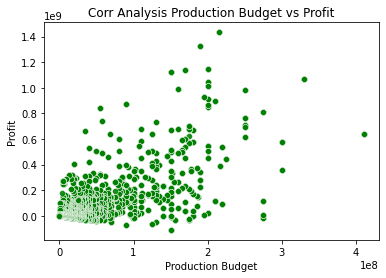

In [80]:
# Create a scatter plot
sns.scatterplot(x= "production_budget", y= "profit" , data= director_names, color= "green", alpha= 0.9)

# Set the x-axis, y-axis labels, and title
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.title("Corr Analysis Production Budget vs Profit");

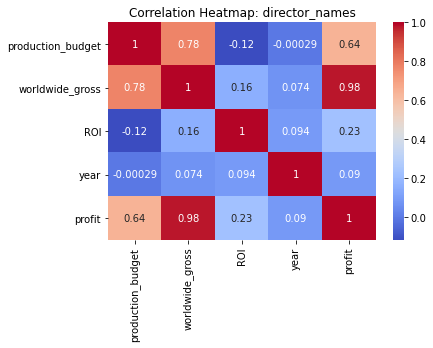

In [81]:
sns.heatmap(director_names.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: director_names");

#### With this data, we can do an analysis to find the directors with the most profitable movies

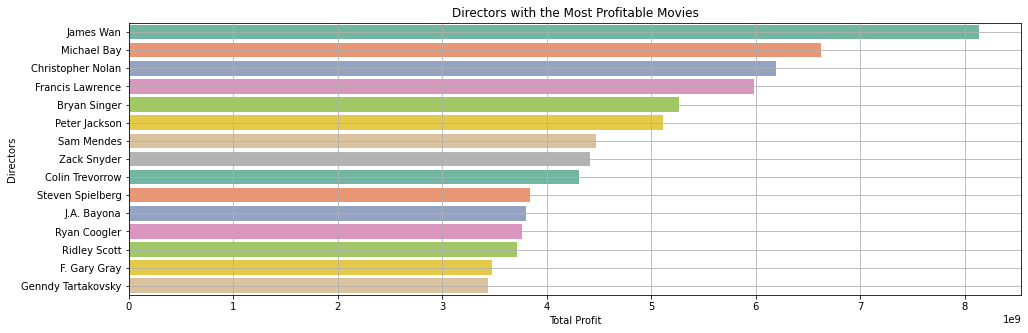

In [82]:
# Grouping the data by directors and calculating the total profit
director_profit = director_names.groupby("directors")["profit"].sum().reset_index()

# Sorting the data by total profit in descending order
director_profit = director_profit.sort_values("profit", ascending= False)

# Plotting the directors and total profit bargraph
plt.figure(figsize= (16, 5))
sns.barplot(data= director_profit[:15], x= "profit", y= "directors", palette= "Set2")
plt.xlabel("Total Profit")
plt.ylabel("Directors")
plt.title("Directors with the Most Profitable Movies")
plt.grid()
plt.show()

## Analysis Findings from our data.

* The genres with the highest ROI, include "Horror", "Thriller", "Mystrey" and  "Comedy".
* The genres that had the highest worldwide_gross and make the highest profits are "Action", "Adventure", "SCi-Fi", "Thriller" and "Crime".
* The genres that have the highest production budgets are "Action", "Fantasy", "Adventure", "Sci-Fi" and "Thriller".
* The studios that had the most profitable movies are "P/DW" , "BV" , "Grtindia", "Uni" and "UTV".
* The studios that made movies with the highest ROI are: "UTV" , "WB(NL)", "ParV", "FD" and "Uni".
* There was a drastic drop in the number of movie releases from 2018 to 2020.
* The most popular genres among the studios are "Drama", "Comedy", "Action", "Crime" and "Thriller" 
* The directors with the most profitable movies were "James Wan", "Michael Bay", "Christopher Nolan", "Francis Lawrence" and "Bryan Singer"

# Conclusions

* Like many other businesses, there Covid 19 Pandemic affected the entertainmaint industrie and movie production companies.
* The "Action" and "Thriller" genres are quite popular among the studios. Even though they are among the genres with the highest production budgets, they are also among the genres that are most profitable.
* "Adventure", and "sci-Fi" also tend to make high profits even though they also have high production budgets.
* "Horror", "Mystrey" and "Comedy" genres offer the highest ROI- This could be attributed to the lower production budgets.
* "Thriller" genre however seems to be a winner as even with the high production budgets, the genre tends to have high profits and ROI.
* "WB", "UTV", "Uni", "Grtindia" and "Par" studios seem to be successful as they trend to make profits and have high ROI on their movie productions.
* Most profitable studios are P/DW(Pixar and DreamWorks) and BV(Buena Vista)a distribution brand and subsidiary of The Walt Disney Studios, which after further research discovered the primary genres are "animations" 


# Recommendations.

From the analysis and conclusions, we now have a better understanding of the business landscape that Microsoft wants to venture into. Here are my recommendations for the Head of Microsoft studios.

#### 1. Winning Genres:
Microsoft Should work to develop more movies in "Action", "Thriller", "Adventure" and "Sci-Fi" genres or a blend of the genres as they tend to have been the most profitable over the years.

#### 2. Budget allocation
Microsoft should allocate higher production budgets to the "Action", "Sci-Fi", "Thriller" and  "Adventure" genres to maximize on the production quality as they have the the most profitable genres over the years.
Lower budgets to be allocated to the "Horror" and "Mystery" genres. Even though the have the highest ROI, they tend to have a niche audience.

#### 3. Opportunities to tap into
With Walt Disney, Pixar and Dreamworks being the most profitable studios, Their primary genre production is "Animations" 
There lies an oppurtunity for Microsoft to tap into the success of the genre as it tends to have a wide target audience.
#### 4. Directors 
Microsoft already being a successful reputable company, Colaborating with the the directors with the most profitable movies on their respective prefered genres will bring more credibility and buzz around the movies before the release.
#### 5. Market Penetration
With the drastic drop in movie production from 2018, Microsoft should consider diversifying the strategy to include a subscription based Movie streaming platform to satisfy the current consumer behavior preference.

Instead of coming in to compete with the already successful studios in the industry. Having a streaming platform will offer an opportunity to partner with the other studios to have their movies on the platform and could also be exlusive releases for Microsoft Studio movies.

# Next Steps
* Deeper analysis on Walt Disney and Dreamworks strategies should be done on the genre types and quality of the animation movies before getting into the production. 
* Proactive analysis of the industry landscape to mitigate any potential risks or tap into new technologies and opportunities.
* Microsoft should also do research on the already existing movie streaming platforms to understand the landscape. Getting to incorporate machine learning algorithms on the platform would be essensial in order to offer the audience a bespoke experience. This would further go to inform future strategies in movie production as it will be Microsoft's first party data to consumer preferences.
